# Project Euler Problem 1
If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

---

A nice little warm-up problem. Basically an exercise in programming since you can easily brute-force the solution.

In [ ]:
# Start with imports
import numpy as np
import matplotlib.pyplot as plt
import time

In [16]:
def f(n,total=0):
    if n == 2:
        # base case
        return total
    else:
        # recusion case
        return f(n-1, (n if n%3==0 or n%5==0 else 0) + total)

The function f(n) computes the number of multiples of 3 or 5 below n. You can optionally specify an amount to add to the sum, if so desired, but really it's there to aid in recursion.

In [24]:
# Double check our solution works on the example
test = f(9)
print("The example problem comes to %d" % test)
assert(test == 23)

# Compute the solution to the problem
print("The answer to the problem is %d" % f(999))

The example problem comes to 23
The answer to the problem is 233168


## Speed Analysis
Not much to see here, let's just see how quickly it runs on average.

In [11]:
# n=1000
%timeit f(999)

301 µs ± 15.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<IPython.core.display.Javascript object>


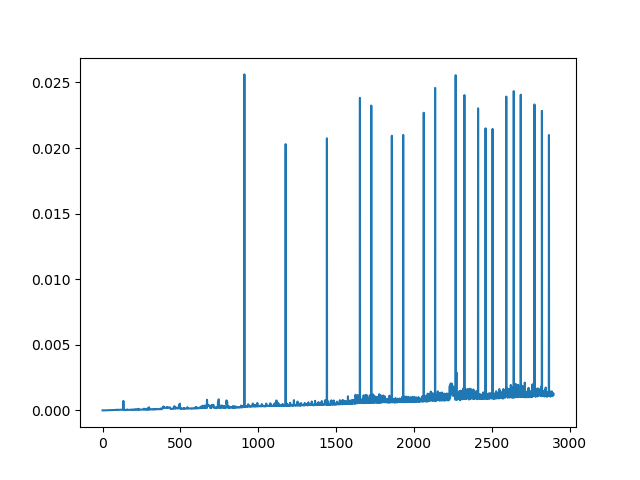

In [45]:
%matplotlib notebook

ys = []
for n in range(3,2900):
    start = time.time()
    f(n)
    ys.append(time.time()-start)

plt.plot(ys)
plt.show()

In [46]:
xs = list(range(3,2900))
print("Slope here is %s" % np.polyfit(xs, ys, 1)[0])

Slope here is 6.273034721110889e-07


Notice that if we try to use $n>2900$ or so here we hit Python's recursion depth limit, so we would have to switch to an iterative approach:

In [6]:
def g(n):
    total = 0
    for i in range(n+1):
        if i%3==0 or i%5==0:
            total += i
    return total

In [15]:
g(999)

233168

Looks pretty good. Let's see how it performs:

In [18]:
# n=1 000
%timeit g(999)

102 µs ± 772 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
# n=10 000
%timeit g(99999)

10.5 ms ± 53.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
# n=1 000 000
%timeit g(9999999)

1.21 s ± 48.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<IPython.core.display.Javascript object>


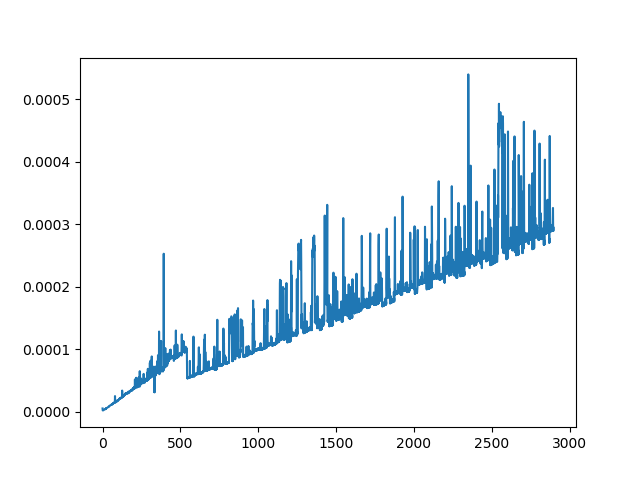

In [47]:
%matplotlib notebook

ys = []
for n in range(3,2900):
    start = time.time()
    g(n)
    ys.append(time.time()-start)

plt.plot(ys)
plt.show()

In [48]:
print("Slope here is %s" % np.polyfit(xs, ys, 1)[0])

Slope here is 9.934554972038084e-08


In [17]:
def T(n):
    return (n*(n+1))/2

def constant(n):
    return 3*T(n//3)+5*T(n//5)-15*T(n//15)

%timeit constant(10**100)
%timeit g(10000000)

2.13 µs ± 74.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.01 s ± 9.41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<IPython.core.display.Javascript object>


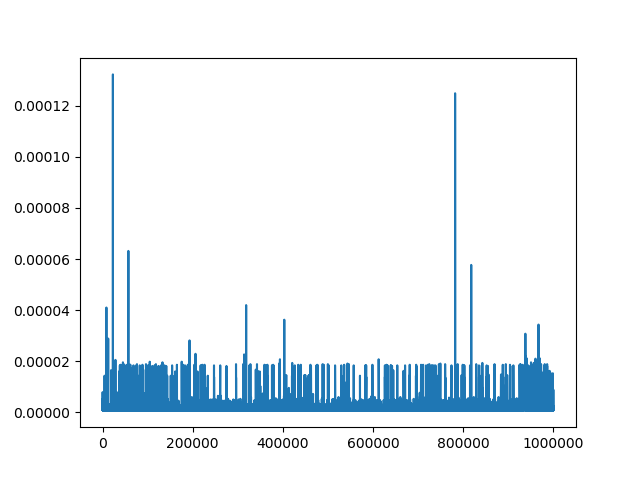

In [13]:
%matplotlib notebook
import time
import matplotlib.pyplot as plt
ys = []
for n in range(3,10**6):
    start = time.time()
    constant(n)
    ys.append(time.time()-start)

plt.plot(ys)
plt.show()

---
## Analysis
While I think the recursive option is more fun/more fancy it is clearly inferior to the simpler iterative approach both in the time and memory necessary to compute the solution.

I was very interested in what was happening in the recursive solution which led to such large spikes in runtime. My hypothesis is that Python hits a (soft) recursion limit and has to allocate a bigger stack when that happens. It accounts for why those spikes are relatively consistent across runs and for why they don't occur at first but then frequently and at (somewhat) regular intervals. I couldn't find a resource online to back up this hunch, however.

---
Addendum: Of course after talking with Thomas he pointed out there was a constant-time algorithm for this. Silly me. :)